In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 获得数据

In [4]:
# 获得数据
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [15]:
# 查看数据
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000, 784)

(70000,)

(-0.5, 27.5, 27.5, -0.5)

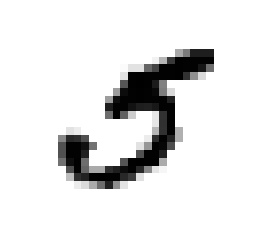

(784,)

(28, 28)

5.0

In [27]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,\
           interpolation="nearest")
plt.axis("off")
plt.show()

some_digit.shape
some_digit_image.shape
y[36000]

# 划分训练集和数据集

In [31]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [33]:
# 打乱顺序 
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
shuffle_index
X_train
y_train

array([57548,  6423, 21497, ..., 16814, 54985, 48857])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([ 0.,  5.,  1., ...,  7.,  5.,  9.])

# 训练估计器

In [34]:
# 训练分类器，就是用于分类的估计器
# 类别表示 label the labels
y_train_5 = (y_train == 5) # 只要是5就为真，不是5就为假
# 类别1 = 数据框[数据框[’列名‘]==条件][’值所在的列‘] 在某种条件，获取列的值
y_test_5 = (y_test == 5) 
y_train_5
y_test_5



array([False,  True, False, ..., False,  True, False], dtype=bool)

array([False, False, False, ..., False, False, False], dtype=bool)

In [37]:
# 使用随机梯度下降，SGD分类器
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

/home/zhangzhiliang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

array([ True], dtype=bool)

# 评估性能 
准确性 persicion recall roc roc&auc



In [40]:
# 手写 Cross_Validation
from sklearn.model_selection import StratifiedKFold # 分层抽样
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/home/zhangzhiliang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

0.91255


/home/zhangzhiliang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

0.96595


/home/zhangzhiliang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

0.9562


In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/home/zhangzhiliang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/zhangzhiliang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/h

array([ 0.91255,  0.96595,  0.9562 ])

In [48]:
#看看哑估计器,也就是看看不是5的分类准确性
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9086 ,  0.9087 ,  0.91165])

# 混淆矩阵 精确率 召回率

In [64]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
y_train_pred

/home/zhangzhiliang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/zhangzhiliang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/h

array([ 0.91255,  0.96595,  0.9562 ])

array([False,  True, False, ..., False,  True, False], dtype=bool)

In [59]:
# 构建混淆矩阵
from sklearn.metrics import confusion_matrix
#y_train_pred = sgd_clf.predict(X_train)
confusion_matrix(y_train_5, y_train_pred)
#confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[52345,  2234],
       [ 1072,  4349]])

In [68]:
# 精确率 和 召回率
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

# 计算f1_score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.66064104511620847

0.80225050728647851

0.72459180273242252

In [73]:
# 分类器中的阀值的作用 也就是判断为1 或为0 的标准
y_score = sgd_clf.decision_function([some_digit])
y_score

threhold=0
y_some_digit_pred = (y_score > threhold)
y_some_digit_pred

threhold2=2000000
y_some_digit_pred2 = (y_score > threhold2)
y_some_digit_pred2



array([ 220878.12435925])

array([ True], dtype=bool)

array([False], dtype=bool)

/home/zhangzhiliang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/zhangzhiliang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/h

array([-508975.47273231,  577566.84837374, -417974.87073927, ...,
       -852783.5648794 ,  334199.50468807, -381740.67411877])

array([ 0.09079489,  0.09077967,  0.09078119, ...,  1.        ,
        1.        ,  1.        ])

array([  1.00000000e+00,   9.99815532e-01,   9.99815532e-01, ...,
         3.68935621e-04,   1.84467810e-04,   0.00000000e+00])

array([-1618262.34835592, -1617981.0608894 , -1617472.99119494, ...,
        1093464.58915851,  1149811.73516422,  1229410.04162345])

/home/zhangzhiliang/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "upper lfet". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


<function matplotlib.pyplot.show>

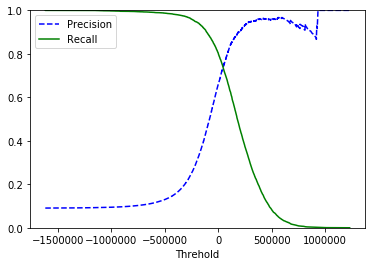

In [93]:
# 通过交叉验证的返回值来确定阀值
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function") # y在不同decision_function上的预测值
y_scores

# 根据y在不同desicion_function的预测值上绘制 精确率和召回率曲线
from sklearn.metrics import precision_recall_curve
precisions, recalls, threholds = precision_recall_curve(y_train_5, y_score)

precisions
recalls
threholds

def plot_precision_recall_vs_threshold(precisions, recalls, threholds):
    plt.plot(threholds, precisions[:-1], "b--", label="Precision")
    plt.plot(threholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threhold")
    plt.legend(loc="upper lfet")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, threholds)
plt.show

In [83]:
precisions.shape
recalls.shape
threholds.shape

(59707,)

(59707,)

(59706,)

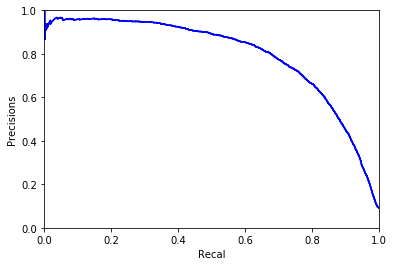

In [89]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b-")
    plt.xlabel("Recal")
    plt.ylabel("Precisions")
    plt.ylim([0, 1])
    plt.xlim([0, 1])

def plot_precision_vs_recall2(precisions, recalls):
    plt.plot(recalls, precisions, "b-")
    plt.xlabel("Recal")
    plt.ylabel("Precisions")
    plt.ylim([0, 1])
    plt.xlim([0, 1])    

plot_precision_vs_recall(precisions, recalls)




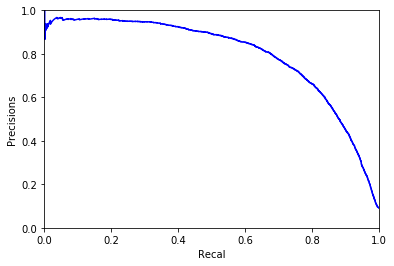

In [90]:
plot_precision_vs_recall2(precisions, recalls)

In [102]:


def compare_threholds_score(threholds_m, y_scores, y):
    y_train_pred= (y_scores > threholds_m)
    return precision_score(y, y_train_pred),recall_score(y_train_5, y_train_pred)
    

for threholds_m in [0, 2000000, 800000]:
    compare_threholds_score(threholds_m, y_scores, y_train_5)


(0.66064104511620847, 0.80225050728647851)

/home/zhangzhiliang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.0, 0.0)

(0.92105263157894735, 0.0064563733628481834)

# 绘制ROC曲线

<function matplotlib.pyplot.show>

0.95461751177978504

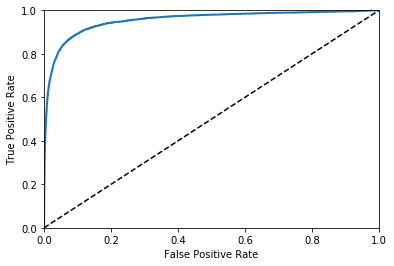

In [111]:
from sklearn.metrics import roc_curve


fpr, tpr, threholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show

# 计算auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

/home/zhangzhiliang/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


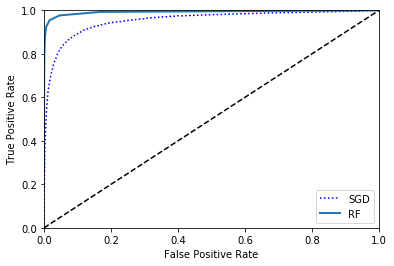

0.99261325710624138

In [115]:
# 通过ROC AUC对比不同的模型
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

# 将随机森林的概率值变化为数值
y_scores_forest = y_probas_forest[:, -1] # 正项分类的值的得分
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "RF")
plt.legend(loc="bottom right")
plt.show()

roc_auc_score(y_train_5, y_scores_forest)
